In [108]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.io import ascii
import lightkurve as lc
import numpy as np
from lightkurve.lightcurve import LightCurve

In [29]:
Curve = lc.KeplerLightCurveFile('/Users/willwaalkes/Desktop/tess2018206045859-s0001-0000000410153553-111-s_llc.fits')

KeyError: "Key 'SAP_QUALITY' does not exist."

In [5]:
TESS_Curve = fits.open('/Users/willwaalkes/Desktop/tess2018206045859-s0001-0000000410153553-111-s_llc.fits')

In [39]:
TESS_Curve.info()

Filename: /Users/willwaalkes/Desktop/tess2018206045859-s0001-0000000410153553-111-s_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   ['D', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'D', 'E', 'D', 'E', 'D', 'E', 'D', 'E', 'E', 'E']   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [41]:
TESS_Curve[1].data

FITS_rec([(1325.29777228, 0.00341565, 70444, 1954.3994, 6.534174 , 889.7305, 2.6215098,    0.    , 0.      , 8, nan, nan, nan, nan, 1109.43573194, 0.00229543, 105.0021158 , 0.00290272,         nan,        nan),
          (1325.29916117, 0.00341565, 70445, 1968.2832, 6.549527 , 894.6726, 2.6225688, 2375.2393, 8.047131, 0, nan, nan, nan, nan, 1109.4058846 , 0.00228123, 104.94730506, 0.00290792, -0.2654934 , 0.2697556 ),
          (1325.30055005, 0.00341565, 70446, 1977.1915, 6.553069 , 892.6039, 2.6201148, 2382.0532, 8.051482, 0, nan, nan, nan, nan, 1109.38580349, 0.00227105, 104.92505417, 0.00290925, -0.29526132, 0.23394889),
          ...,
          (1353.17661221, 0.00310006, 90517, 1996.3856, 6.598201 , 914.1213, 2.6476192, 2383.2295, 8.106934, 0, nan, nan, nan, nan, 1109.39601644, 0.00226165, 104.95122898, 0.0028907 , -0.28675586, 0.26849842),
          (1353.17800106, 0.00310003, 90518, 1996.301 , 6.59691  , 910.0823, 2.645074 , 2383.4622, 8.105348, 0, nan, nan, nan, nan, 1109.3841

In [37]:
lightcurve = TESS_Curve[1].data

In [103]:
time = lightcurve['TIME']
flux = lightcurve['SAP_FLUX']
quality = lightcurve['QUALITY']

In [104]:
high_q = np.where(quality == 0)
time = time[high_q]
flux = flux[high_q]

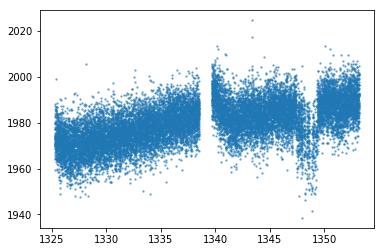

In [90]:
plt.scatter(time,flux,s=2,alpha=0.5)

(1340, 1354.574266282966)

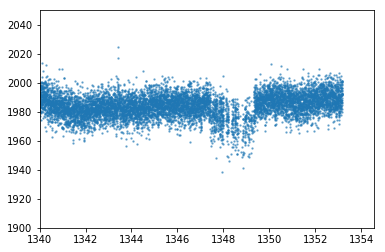

In [91]:
plt.scatter(time,flux,s=2,alpha=0.5)
plt.ylim(1900,2050)
plt.xlim(1340,)

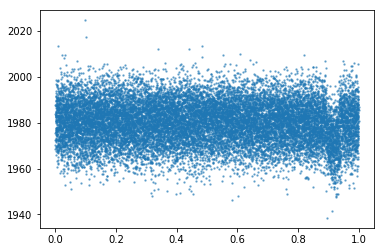

In [105]:
period = 0.463 #days
phase = (time-time[0])/period

phase = np.nan_to_num(phase)
flux = np.nan_to_num(flux)

phase = np.delete(phase,np.where(flux==0))
flux = np.delete(flux,np.where(flux==0))

for i in range(len(phase)):
    phase[i] = str(phase[i]-int(phase[i]))[1:]
        
plt.scatter(phase,flux,s=2,alpha=0.5)

In [109]:
lc = LightCurve(phase,flux)

In [110]:
lc.normalize()

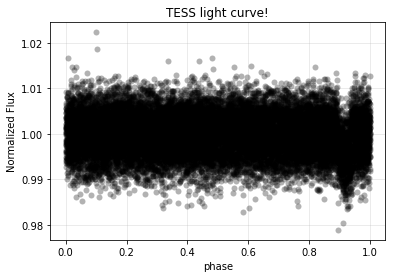

In [116]:
lc.plot(marker='o', linewidth=0, markeredgecolor='none', alpha=0.3,xlabel='phase',title='TESS light curve!')